In [1]:
import os.path as path
import numpy as np
import Corrfunc
from Corrfunc.theory import wp
from Corrfunc.theory.DDrppi import DDrppi
import fitsio
import matplotlib.pyplot as plt
import import_ipynb
from functions import create_data, plot_results, wp_pairs_cross

galaxies = "/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/base_c000_ph000/z0p300/model_hod000000/gals.fit"
halos = "/projects/hywu/cluster_sims/cluster_finding/data/AbacusSummit_base/base_c000/base_c000_ph000/z0p300/halos_3e+12.fit"

In [10]:
nbins = 20
rmin = 0.1
rmax = 20.0
rbins = np.logspace(np.log10(0.1), np.log10(rmax), nbins + 1)
labels = []
for i in range(0, 20):
    labels.append(f"ph{i:03}")

# Phase 000 Test calculations

In [4]:
g_x, g_y, g_z = create_data(galaxies)
h_x, h_y, h_z = create_data(halos, range_ = True, var = 'mass', min = 10**13)
wp_0, rpavg_0= wp_pairs_cross(g_x, g_y, g_z, h_x, h_y, h_z, pimax = 100, bins = rbins, boxsize=max(g_x))

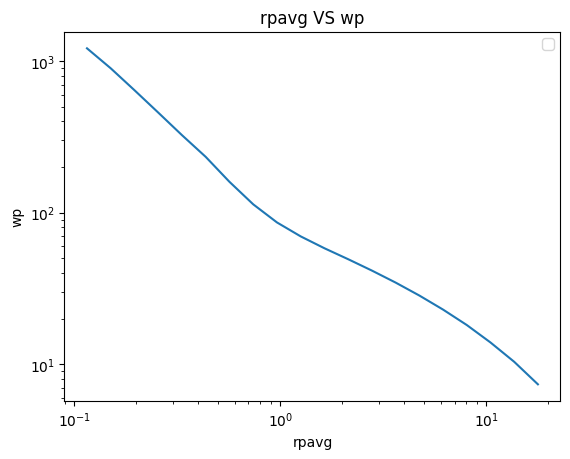

In [5]:
plot_results([rpavg_0], [wp_0])

# Phase 001 - 019 calculations : mass > 10^14

In [8]:
all_wp14 = []
all_rpavg14 = []
for i in range(0, 20):
    galaxies = f"/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/base_c000_ph{i:03}/z0p300/model_hod000000/gals.fit"
    halos = f"/projects/hywu/cluster_sims/cluster_finding/data/AbacusSummit_base/base_c000/base_c000_ph{i:03}/z0p300/halos_3e+12.fit"
    g_x, g_y, g_z = create_data(galaxies)
    h_x, h_y, h_z = create_data(halos, range_ = True, var = 'mass', min = 10**14)
    wp_, rpavg_ = wp_pairs_cross(g_x, g_y, g_z, h_x, h_y, h_z, pimax = 100, bins = rbins, boxsize=max(g_x))
    all_wp14.append(wp_)
    all_rpavg14.append(rpavg_)

20


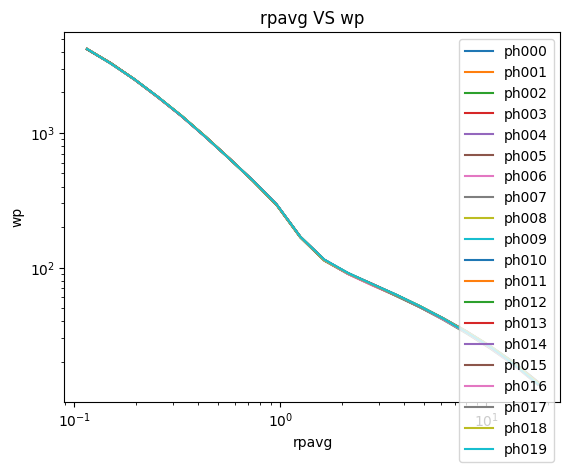

In [ ]:
plot_results(all_rpavg14, all_wp14, labels)

In [13]:
np.savez('mass_e14.npz', array_one = np.array(all_rpavg14), array_two = np.array(all_wp14))

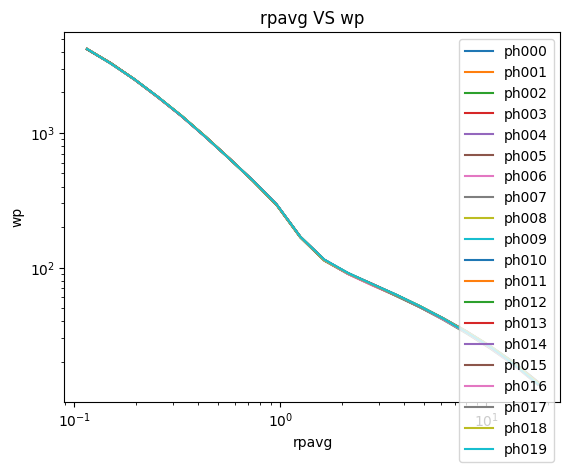

In [14]:
e14 = np.load('mass_e14.npz')
rpavg_ = e14['array_one']
wp_ = e14['array_two']
plot_results(rpavg_, wp_, labels=labels)

# Phase 001 - 019: mass > 10^13

In [15]:
all_wp13 = []
all_rpavg13 = []

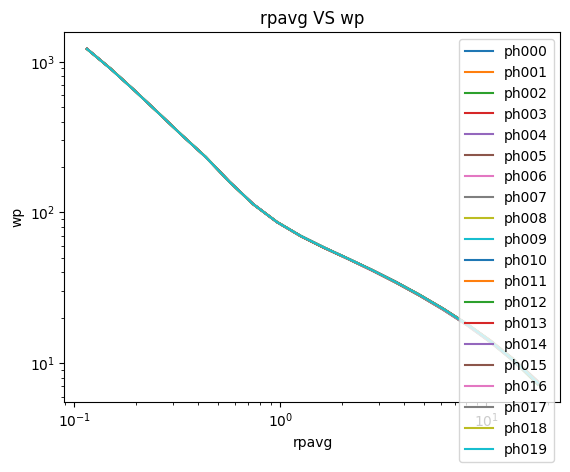

In [16]:
for i in range(0, 20):
    galaxies = f"/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/base_c000_ph{i:03}/z0p300/model_hod000000/gals.fit"
    halos = f"/projects/hywu/cluster_sims/cluster_finding/data/AbacusSummit_base/base_c000/base_c000_ph{i:03}/z0p300/halos_3e+12.fit"
    g_x, g_y, g_z = create_data(galaxies)
    h_x, h_y, h_z = create_data(halos, range_ = True, var = 'mass', min = 10**13)
    wp_, rpavg_ = wp_pairs_cross(g_x, g_y, g_z, h_x, h_y, h_z, pimax = 100, bins = rbins, boxsize=max(g_x))
    all_wp13.append(wp_)
    all_rpavg13.append(rpavg_)
plot_results(all_rpavg13, all_wp13, labels)

In [17]:
np.savez('mass_e13.npz', array_one = np.array(all_rpavg13), array_two = np.array(all_wp13))

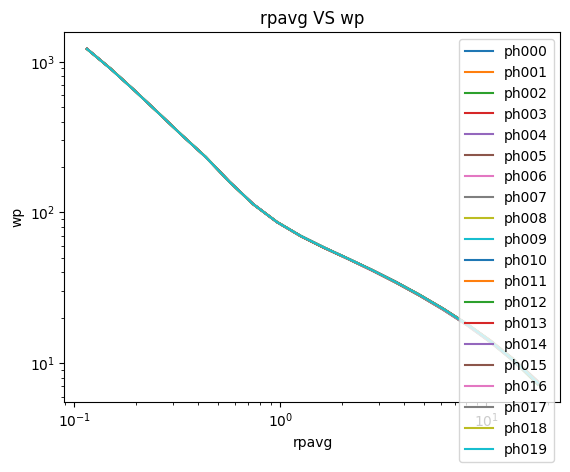

In [18]:
e13 = np.load('mass_e13.npz')
rpavg_ = e13['array_one']
wp_ = e13["array_two"]
plot_results(rpavg_, wp_, labels)

# Phase 001 - 019: mass > 0

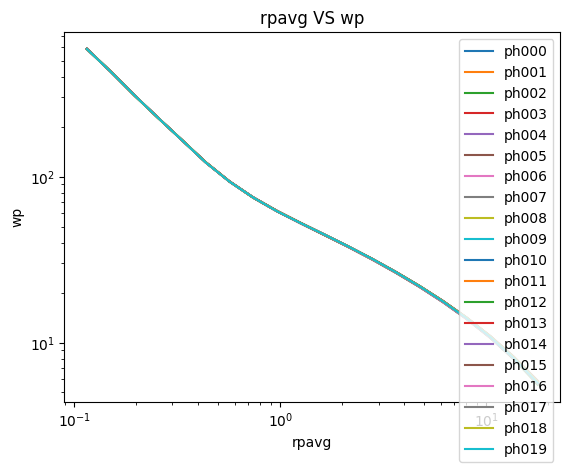

In [19]:
all_wp0 = []
all_rpavg0 = []
for i in range(0, 20):
    galaxies = f"/projects/hywu/cluster_sims/cluster_finding/data/emulator_data/base_c000_ph{i:03}/z0p300/model_hod000000/gals.fit"
    halos = f"/projects/hywu/cluster_sims/cluster_finding/data/AbacusSummit_base/base_c000/base_c000_ph{i:03}/z0p300/halos_3e+12.fit"
    g_x, g_y, g_z = create_data(galaxies)
    h_x, h_y, h_z = create_data(halos)
    wp_, rpavg_ = wp_pairs_cross(g_x, g_y, g_z, h_x, h_y, h_z, pimax = 100, bins = rbins, boxsize=max(g_x))
    all_wp0.append(wp_)
    all_rpavg0.append(rpavg_)
plot_results(all_rpavg0, all_wp0, labels)

In [20]:
np.savez('mass_0.npz', array_one = all_rpavg0, array_two = all_wp0)

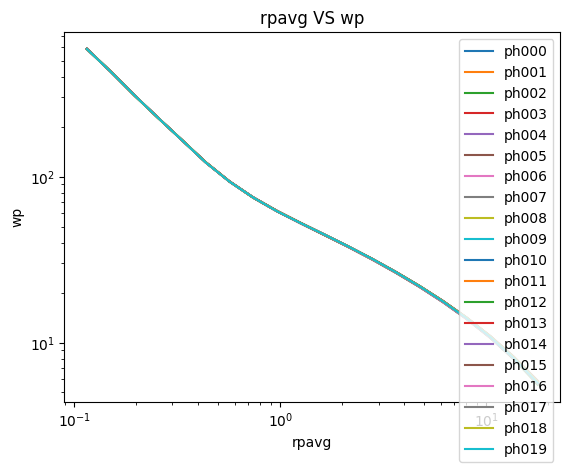

In [21]:
e0 = np.load('mass_0.npz')
rpavg_ = e0['array_one']
wp_ = e0['array_two']
plot_results(rpavg_, wp_, labels)